# Question 1

In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-18 19:20:27--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-18 19:20:27 (20.0 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [44]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [45]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


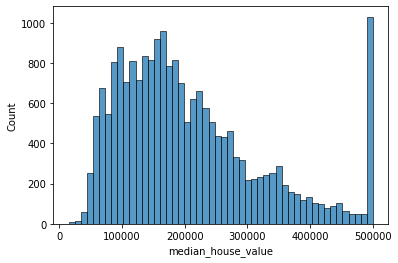

In [46]:
sns.histplot(df["median_house_value"], bins=50)

In [47]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [48]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [49]:
df.population.median()

1166.0

# Split the data

In [50]:
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test =int(n * 0.2)
n_train, n_val, n_test

(12384, 4128, 4128)

In [51]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [52]:
idx = np.arange(n)

In [53]:
np.random.seed(42)
np.random.shuffle(idx)

In [54]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [55]:
median_house_value_log = np.log1p(df.median_house_value)

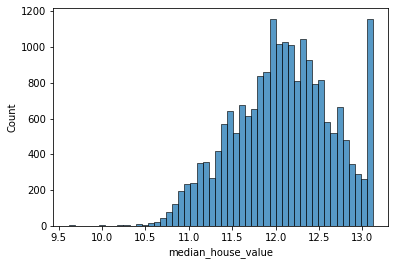

In [56]:
sns.histplot(median_house_value_log, bins=50)

In [57]:
  df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [58]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [61]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [62]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [67]:
def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values
    return X

In [64]:
def prepare_X_mean(df):
    mean_train = df_train['total_bedrooms'].mean()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_train)

    X = df.values
    return X

In [65]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [69]:
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train,)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
R = rmse(y_val, y_pred)
round(R,2)

0.33

In [70]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train,)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
R = rmse(y_val, y_pred)
round(R,2)

0.33

# Question 4

In [78]:
r_list =[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_list:
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r=r)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    R = rmse(y_val, y_pred)

    print(r,round(R,2))

0 0.33
1e-06 0.33
0.0001 0.33
0.001 0.33
0.01 0.33
0.1 0.33
1 0.33
5 0.34
10 0.34


Answer = 0

# Question 5

In [83]:
loop = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
error_list = []
for i in loop:
  n = len(df)
  n_train = int(n * 0.6)
  n_val = int(n * 0.2)
  n_test =int(n * 0.2)
  n_train, n_val, n_test

  df_train = df.iloc[:n_train]
  df_val = df.iloc[n_train:n_train+n_val]
  df_test = df.iloc[n_train+n_val:]

  idx = np.arange(n)

  np.random.seed(i)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]

  df_train.head()

  len(df_train), len(df_val), len(df_test)

  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = prepare_X_0(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train,r=0)

  X_val = prepare_X_0(df_val)
  y_pred = w0 + X_val.dot(w)
  R = rmse(y_val, y_pred)
  error_list.append(R)
error_list

[0.3388430480530326,
 0.33623872559566276,
 0.3320912318833194,
 0.34051536090377893,
 0.33890240665742954,
 0.34348667257187443,
 0.34519809530991635,
 0.3395989927407549,
 0.34662308731992736,
 0.3365926124190451]

In [87]:
round(np.std(error_list),3)

0.004

# Question 6

In [ ]:
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test =int(n * 0.2)
n_train, n_val, n_test

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train.head()

len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [93]:
df_full_train = pd.concat([df_train , df_val]).reset_index(drop = True)
X_full_train = prepare_X_0(df_full_train)
y_full_train = np.concatenate([y_train,y_val])
w0, w = train_linear_regression(X_full_train, y_full_train)


X_test = prepare_X_0(df_test)
y_pred = w0 + X_test.dot(w)
R = rmse(y_test, y_pred)
round(R,2)

0.35